# <font color="blue"> LESSON 4: Visualizing Data in Python with Pandas </font>


# Lesson Goals

By using pandas with other packages like matplotlib we can visualize data within our notebook.

We’ll be visualizing data about the popularity of a given name over the years. In order to do that, we need to set and sort indexes to rework the data that will allow us to see the changing popularity of a particular name.


First we'll copy the last example from lesson 3.  This will allow us to combine multiple tables.

Import everything we need

In [2]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re

Let’s also tell Python Notebook to keep our graphs inline:



In [3]:
%matplotlib inline

Look at data quickly

In [4]:
df = pd.read_csv("./data/names/yob2000.csv", names=["Name", "Gender","Babies"])
df.head()

,Name,Gender,Babies
0,Emily,F,25953
1,Hannah,F,23078
2,Madison,F,19967
3,Ashley,F,17996
4,Sarah,F,17691


From Lesson 3

In [5]:
def extract_year(string):
    match = re.match(".+(\d{4})", string) 
    if match != None: return match.group(1)

In [6]:
path = './data/names'
allFiles = glob.glob(path + "/yob*.csv")
frame = pd.DataFrame()
df_list= []

In [7]:
for file_ in allFiles:
    df = pd.read_csv(file_, names=["Name", "Gender","Babies"])
    df.columns = map(str.lower, df.columns)
    df["year"] = extract_year(file_)
    df_list.append(df)
    
df = pd.concat(df_list)
df.head()

,name,gender,babies,year
0,Emily,F,19353,2007
1,Isabella,F,19134,2007
2,Emma,F,18365,2007
3,Ava,F,18046,2007
4,Madison,F,17956,2007


Index our data with information on Sex, then Name, then Year. We’ll also want to sort the index:

In [8]:
all_names = df.copy()
all_names.head()

,name,gender,babies,year
0,Emily,F,19353,2007
1,Isabella,F,19134,2007
2,Emma,F,18365,2007
3,Ava,F,18046,2007
4,Madison,F,17956,2007


In [9]:
all_names.tail()

,name,gender,babies,year
33888,Zylar,M,5,2011
33889,Zylas,M,5,2011
33890,Zyran,M,5,2011
33891,Zyshawn,M,5,2011
33892,Zytavion,M,5,2011


In [10]:
all_names_index = all_names.set_index(['gender','name','year']).sort_index()

In [11]:
all_names_index

babies
gender name   year        
F      Aabha  2011       7
              2012       5
              2014       9
              2015       7
              2016       7
...                    ...
M      Zyus   2015       5
       Zyvion 2009       5
       Zyvon  2015       6
       Zyyon  2014       6
       Zzyzx  2010       5

[559206 rows x 1 columns]

Next, we’ll want to write a function that will plot the popularity of a name over time. We’ll call the function name_plot and pass gender and name as its parameters that we will call when we run the function.

We’ll want to plot the values with matplotlib.pyplot which we imported as pp. We’ll then plot the values of the sex and name data against the index, which for our purposes is years.

In [12]:
def name_plot(gender, name):
    data = all_names_index.loc[gender, name]
    pp.plot(data.index, data.values)

We can now call the function with the gender and name of our choice, such as F for female with the given name Danica.

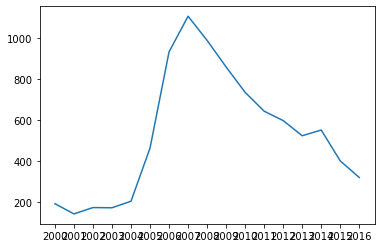

In [13]:
name_plot('F', 'Danica')

Next, let’s create a list with all the names we would like to plot:

In [14]:
names = ['Sammy', 'Jesse', 'Drew', 'Bobbie']

Now, we can iterate through the list with a for loop and plot the data for each name. 
We also added a line to make the figure larger and label the axes

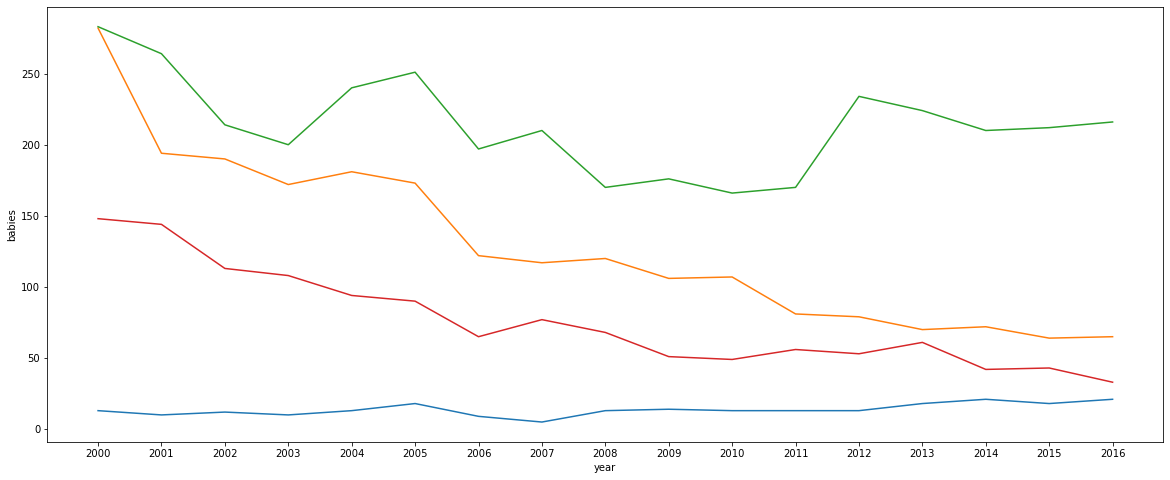

In [15]:
pp.figure(figsize = (20, 8))
pp.xlabel("year")
pp.ylabel("babies")

for name in names:
    name_plot('F', name)

Our plot needs a legend

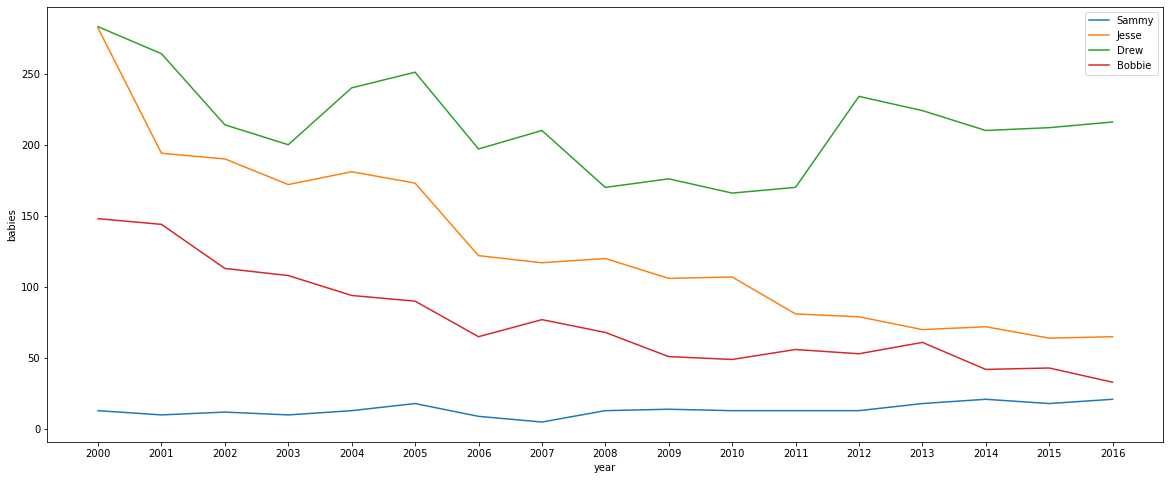

In [16]:
pp.figure(figsize = (20, 8))
pp.xlabel("year")
pp.ylabel("babies")

for name in names:
    name_plot('F', name)

pp.legend(names)

Let’s plot the same names but this time as male names:

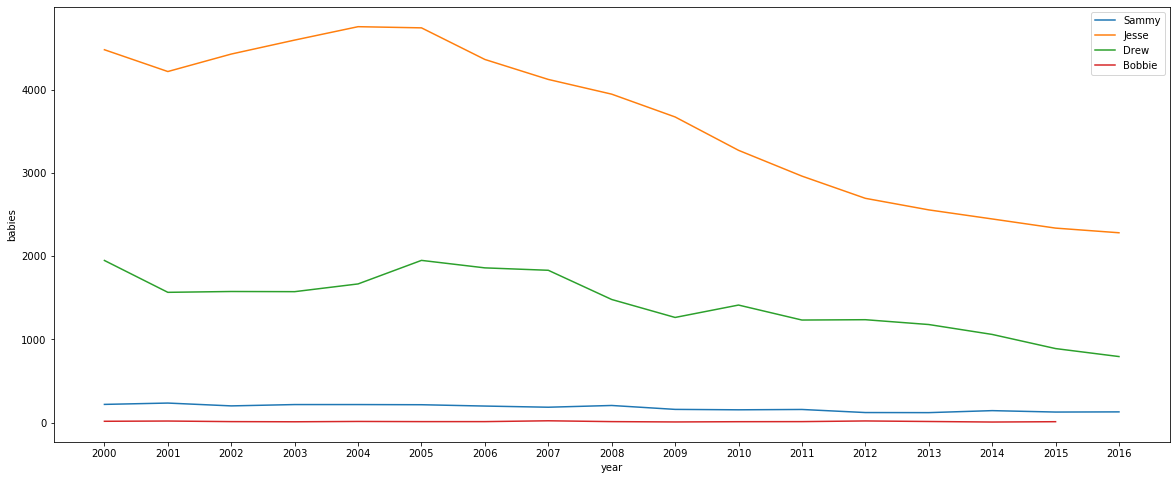

In [17]:
pp.figure(figsize = (20, 8))
pp.xlabel("year")
pp.ylabel("babies")

for name in names:
    name_plot('M', name)

pp.legend(names)

<img src=images/finishline.gif width=300px>

<center> <b>Congratulations!  You finished the last lesson!</b></center>